<a href="https://colab.research.google.com/github/serg-kas/NN-archive/blob/main/%D0%90%D0%BF%D1%80%D0%B5%D0%BB%D1%8C%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D1%83%D1%80%D1%81_2020_Light_%D0%94%D0%BE%D0%BC%D0%B0%D1%88%D0%BD%D0%B5%D0%B5_%D0%B7%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_23_%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%BD%D1%8B%D0%B5_%D0%B0%D0%B2%D1%82%D0%BE%D0%BA%D0%BE%D0%B4%D0%B8%D1%80%D0%BE%D0%B2%D1%89%D0%B8%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Light задание

Используйте **готовый ноутбук** с VAE и CVAE с занятия

1. Попробуйте разные размеры скрытого пространства VAE - 10, 20, 100, 200, опишите результаты сравнения
2. Сделайте свёрточный VAE, опишите разницу результатов с полносвязным
3. Сделайте более мощный CVAE, обучите больше эпох до более низкого уровня ошибки и сравните изображения, которые получаются в итоге, коррелирует ли уровень ошибки с качеством изображений
4. Подайте 5 раз в decoder CVAE один и тот же случайный вектор и label любой от 0 до 9 на выбор, посмотрите, что сгенерирует CVAE


# AE


## Простой полносвязный автоэнкодер




In [ ]:
from tensorflow.keras.datasets import fashion_mnist # загружаем готовую базу mnist(fashion- с одеждой, обувью и т.п)
import numpy as np # загружаем библиотеку для работы с массивами данных

#(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загружаем данные из базы с разбивкой на train/test
x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
import numpy as np # загружаем библиотеку для работы с массивами данных

(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы с разбивкой на train/test

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
import seaborn as sns # более высокоуровневое API на базе библиотеки matplotlib
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций

def plot_digits(*args): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args] # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    
    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    for j in range(n):
        for i in range(len(args)):
            ax = plt.subplot(len(args), n, i*n + j + 1) # задаем параметры и создаем сабплоты
            plt.imshow(args[i][j]) # выведем картинку
            plt.gray() # в черно-белых цветах 
            ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
            ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой

    plt.show() # выводим отрисованное на экран

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape # загружаем необходимые слои
from tensorflow.keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса

def create_dense_ae(): # объявляем функцию создания автокодировщика
    # Размерность кодированного представления
    encoding_dim = 49

    # Энкодер
    # Входной плейсхолдер
    input_img = Input(shape=(28, 28, 1)) # 28, 28, 1 - размерности строк, столбцов, фильтров одной картинки, без батч-размерности
    # Вспомогательный слой решейпинга
    flat_img = Flatten()(input_img)
    # Кодированное полносвязным слоем представление
    encoded = Dense(encoding_dim, activation='relu')(flat_img)
    
    # Декодер
    # Раскодированное другим полносвязным слоем изображение
    input_encoded = Input(shape=(encoding_dim,)) # задаем входную размерность (49,)
    flat_decoded = Dense(28*28, activation='sigmoid')(input_encoded) # далее полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(flat_decoded) # меняем форму, приводим к нужным нам размерам

    # Модели, в конструктор первым аргументом передаются входные слои, а вторым выходные слои
    # Другие модели можно так же использовать как и слои
    encoder = Model(input_img, encoded, name="encoder")
    
    decoder = Model(input_encoded, decoded, name="decoder")
    
    # Построим модель автокодировщика (внутри двойное преобразование - сжатие/разжатие)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder")
    return encoder, decoder, autoencoder # функция вернет 3 собранные сетки

In [ ]:
encoder, decoder, autoencoder = create_dense_ae() # создаем три сетки с помощью заданной ранее функции
autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь 

In [ ]:
autoencoder.summary() # взглянем на информацию о полученной модели автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 49)                38465     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         39200     
Total params: 77,665
Trainable params: 77,665
Non-trainable params: 0
_________________________________________________________________


In [ ]:
decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 49)]              0         
_________________________________________________________________
dense_1 (Dense)              (None, 784)               39200     
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 39,200
Trainable params: 39,200
Non-trainable params: 0
_________________________________________________________________


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/100
235/235 [==============================] - 1s 4ms/step - loss: 0.2587 - val_loss: 0.1734
Epoch 2/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1541 - val_loss: 0.1366
Epoch 3/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1282 - val_loss: 0.1183
Epoch 4/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1126 - val_loss: 0.1048
Epoch 5/100
235/235 [==============================] - 1s 3ms/step - loss: 0.1018 - val_loss: 0.0964
Epoch 6/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0947 - val_loss: 0.0907
Epoch 7/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0899 - val_loss: 0.0870
Epoch 8/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0866 - val_loss: 0.0842
Epoch 9/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0843 - val_loss: 0.0825
Epoch 10/100
235/235 [==============================] - 1s 3ms/step - loss: 0.0829 - val_lo

In [ ]:
n = 15 # выбираем количество картинок
imgs = x_test[:n] # взяли первые от x_test
encoded_imgs = encoder.predict(imgs, batch_size=n) # перевели их энкодером в скрытое пространство
encoded_imgs[1] # взглянем на форму выбранной картинки в скрытом пространстве

array([ 8.625722 ,  5.3697906,  6.6245155, 13.595857 , 14.649905 ,
       13.023887 , 15.226416 ,  3.6959388,  8.731669 ,  9.25304  ,
        4.0322123,  2.4710379,  4.438104 ,  5.3778625,  2.7418334,
        4.179343 ,  4.7595806,  6.059631 ,  7.040734 ,  1.4308403,
       12.432743 ,  9.786071 ,  6.806937 ,  7.235183 , 13.710518 ,
        7.74045  ,  3.8180373,  8.089428 ,  5.5323358,  5.146199 ,
       18.170033 ,  3.300033 ,  4.371005 ,  7.746958 ,  7.102936 ,
        5.0697703, 11.105755 ,  7.0691285,  6.7199974,  3.558824 ,
        3.7867846, 10.267461 ,  1.4606712,  6.4609137,  8.592504 ,
        4.509805 ,  5.7970924,  2.684217 ,  5.6941776], dtype=float32)

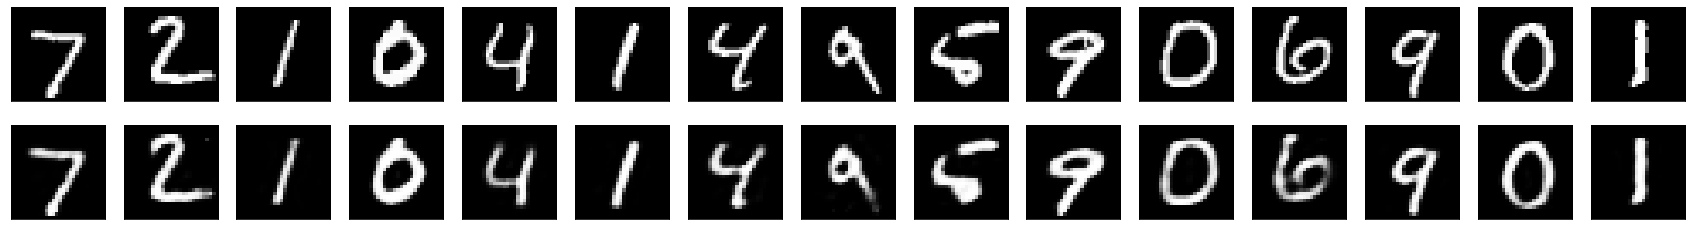

In [ ]:
decoded_imgs = decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование этих картинок декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки обычный автокодировщик

## Сверточный автоэнкодер




In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Conv2DTranspose # загружаем слои для свертки

def create_deep_conv_ae(): # объявляем функцию создания глубокого сверточного автокодировщика
    input_img = Input(shape=(28, 28, 1)) # размерности строк, столбцов, фильтров одной картинки, без батч-размерности

    x = Conv2D(128, (7, 7), activation='relu', padding='same')(input_img) # входные данные передаем на слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # передаём на слой подвыборки, снижающий размерность поступивших на него данных
    x = Conv2D(32, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = MaxPooling2D((2, 2), padding='same')(x) # второй слой подвыборки
    
    encoded = Conv2D(1, (7, 7), activation='relu', padding='same')(x) # финальный слой свертки энкодера. Сжали в пространство 7на7

    # На этом моменте представление  (7, 7, 1) т.е. 49-размерное

    input_encoded = Input(shape=(7, 7, 1)) # задаем эти размеры как входные в декодер
    x = Conv2D(32, (7, 7), activation='relu', padding='same')(input_encoded) # входные данные передаем на слой двумерной свёртки
    x = UpSampling2D((2, 2))(x)  # Conv2DTranspose. Cлой разжимает данные, стало 14на14
    x = Conv2D(128, (2, 2), activation='relu', padding='same')(x) # второй слой двумерной свёртки
    x = UpSampling2D((2, 2))(x) # второй слой разжатия данных, стало 28на28
    decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x) # финальный слой свертки энкодера

    # Модели
    encoder = Model(input_img, encoded, name="encoder") # задаем модель энкодера(сжатие картинки)
    decoder = Model(input_encoded, decoded, name="decoder") # задаем модель декодера(разжатие картинки)
    autoencoder = Model(input_img, decoder(encoder(input_img)), name="autoencoder") # задаем модель автокодировщика(сжатие-разжатие)
    return encoder, decoder, autoencoder # функция возвращает 3 сетки

c_encoder, c_decoder, c_autoencoder = create_deep_conv_ae() # создаем три сетки с помощью заданной ранее функции
c_autoencoder.compile(optimizer='adam', loss='binary_crossentropy') # компилируем модель с выбранным оптимайзером и функцией потерь

c_autoencoder.summary() # взглянем на информацию о полученной модели сверточного автокодировщика

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
encoder (Functional)         (None, 7, 7, 1)           24385     
_________________________________________________________________
decoder (Functional)         (None, 28, 28, 1)         24385     
Total params: 48,770
Trainable params: 48,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
c_decoder.summary() # отдельно взглянем на информацию о декодере

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 7, 7, 1)]         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          1600      
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 128)       16512     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 128)       0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 1)         6273      
Total params: 24,385
Trainable params: 24,385
Non-trainable params: 0
_______________________________________________________

In [ ]:
c_autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test)) # грузим наши данные в модель, задаем параметры и обучаем

Epoch 1/50
235/235 [==============================] - 10s 44ms/step - loss: 0.1764 - val_loss: 0.0988
Epoch 2/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0940 - val_loss: 0.0902
Epoch 3/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0875 - val_loss: 0.0881
Epoch 4/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0839 - val_loss: 0.0815
Epoch 5/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0819 - val_loss: 0.0799
Epoch 6/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0804 - val_loss: 0.0784
Epoch 7/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0793 - val_loss: 0.0782
Epoch 8/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0784 - val_loss: 0.0773
Epoch 9/50
235/235 [==============================] - 10s 43ms/step - loss: 0.0777 - val_loss: 0.0761
Epoch 10/50
235/235 [==============================] - 10s 43ms/step - loss: 0.077

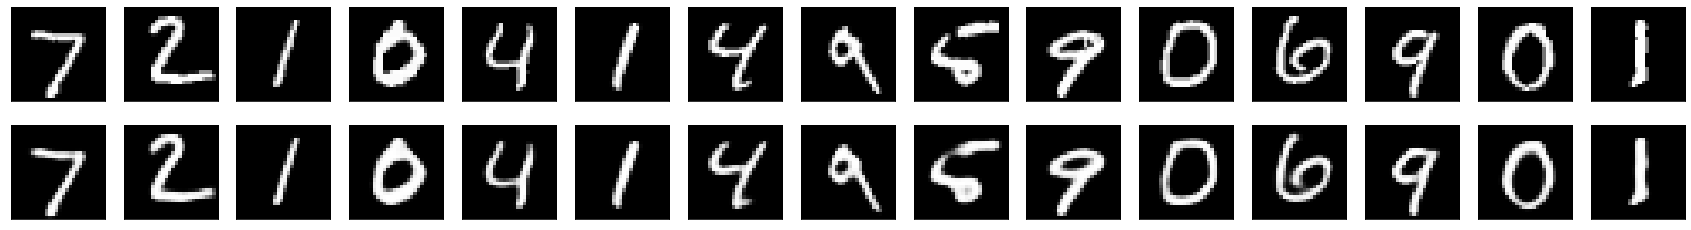

In [ ]:
n = 15 # выбираем количество картинок

imgs = x_test[:n] # взяли первые от x_test
encoded_imgs = c_encoder.predict(imgs, batch_size=n) # делаем преобразование энкодером
decoded_imgs = c_decoder.predict(encoded_imgs, batch_size=n) # делаем преобразование декодером

plot_digits(imgs, decoded_imgs) # взглянем как преобразовал картинки сверточный автокодировщик

# VAE

Менял **размеры скрытого пространства** VAE - 10, 20, 100, 200. Практической разницы не заметил. Скорость обучения немного замедляется. Ошибка практически не меняется. И визуальные результаты работы модели не отличимы. Больший эффект есть если обучить например не 20 эпох (как было установлено), а например 100..


In [ ]:
!pip install keras==2.0 -q # загружаем эту версию кераса для корректной работы скрипта
!pip install tensorflow==1.0 -q  # загружаем эту версию тензорфлоу  для корректной работы скрипта

     |████████████████████████████████| 194kB 4.9MB/s 
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.0 which is incompatible.
     |████████████████████████████████| 44.5MB 76kB/s 


In [ ]:
import sys # модуль содержит параметры и функции, которые относятся к Python и его среде
import numpy as np # загружаем библиотеку для работы с массивами данных
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
import seaborn as sns # более высокоуровневое API на базе библиотеки matplotlib
from scipy.stats import norm # модуль с нормальными непрерывными случайными величинами
#from keras.datasets import fashion_mnist # загружаем готовую базу mnist(fashion- с одеждой, обувью и т.п)

from keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
from keras.optimizers import Adam, RMSprop # загружаем выбранные оптимизаторы
from keras.layers import Input, Dense  # загружаем необходимые слои(входной, полносвязный)
from keras.layers import BatchNormalization, Dropout, Flatten, Reshape, Lambda # загружаем слои(нормализации, регуляризации и т.д)
from keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса

from keras.objectives import binary_crossentropy # импортируем функцию потерь
from keras.layers.advanced_activations import LeakyReLU # импортируем функцию активации отдельным слоем
from keras import backend as K # устанавливаем переменную для окружения кераса
from IPython.display import clear_output # импортируем модуль очистки output'а ячейки
from keras.callbacks import LambdaCallback, ReduceLROnPlateau, TensorBoard # импортируем коллбэки

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:474: FutureWarn

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы mnist с разбивкой на train/test
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data() # загружаем данные из базы fashion_mnist с разбивкой на train/test

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

In [ ]:
batch_size = 500 # размер батча
latent_dim = 10 # размер скрытого слоя/пространства
dropout_rate = 0.3 # размер слоя регуляризации, "выключим" указанное количество нейронов, во избежание переобучения
start_lr = 0.0001 # шаг обучения

In [ ]:
def create_vae(): # объявляем функцию создания вариационного автокодировщика
    models = {} # задаем словарь моделей

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x): # функция будет принимать на вход слой x
        return Dropout(dropout_rate)(BatchNormalization()(x)) # и применять к нему регуляризацию/нормализацию

    # Энкодер
    input_img = Input(batch_shape=(batch_size, 28, 28, 1)) # размерности батч, строк, столбцов, фильтров одной картинки
    x = Flatten()(input_img) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(128, activation='relu')(x) # полносвязный слой на 128 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации

    # Предсказываем параметры распределений
    # Вместо того, чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации
    
    z_mean = Dense(latent_dim)(x) # скрытое пространство(мат.ожидание) размером 10
    
    z_log_var = Dense(latent_dim)(x) # скрытое пространство(лог.вариации) размером 10

    # Сэмплирование из Q с трюком репараметризации
    def sampling(args): # обьявляем функцию сэмплирования
        z_mean, z_log_var = args # принимаем в аргументах z_mean, z_log_var, раскусываем их
        
        # Керасовским методом делаем нормальное распределение(500 10тимерных), мат.ожидание 0, ст.отклонение 1
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
        
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Задаем самописный слой, к-й принимает лист [z_mean, z_log_var], семплирует, и на выходе выдает размерность (10,)
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    models["encoder"]  = Model(input_img, l, 'Encoder') # модель энкодера от входа до лямбда слоя
    
    models["z_meaner"] = Model(input_img, z_mean, 'Enc_z_mean') # отдельная модель с путем от входа до z_mean
    
    models["z_lvarer"] = Model(input_img, z_log_var, 'Enc_z_log_var') # отдельная модель с путем от входа до z_log_var

    # Декодер
    z = Input(shape=(latent_dim, )) # задаем входную размерность (10,)
    x = Dense(128)(z) # полносвязный слой на 128 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(256)(x) # полносвязный слой на 256 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(28*28, activation='sigmoid')(x) # полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(x) # меняем форму, приводим к нужным нам размерам

    models["decoder"] = Model(z, decoded, name='Decoder') # собираем модель декодера
    
    # Cобираем вариационный автокодировщик, также двойное преобразование над входной картинкой(энкодер-декодер)
    models["vae"] = Model(input_img, models["decoder"](models["encoder"](input_img)), name='VAE')

    def vae_loss(x, decoded): # объявляем самописную функцию потерь
        x = K.reshape(x, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) x через керасовскую функцию
        decoded = K.reshape(decoded, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) decoded через керасовскую функцию
        xent_loss = 28*28*binary_crossentropy(x, decoded) # берем бинарную кроссэнтропию между x и decoded, с учетом пикселей
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) # по формуле устанавливаем ошибку kl_loss
        return (xent_loss + kl_loss)/2/28/28 # функция вернет суммарную ошибку с учетом распределения и размеров пикселей

    return models, vae_loss

models, vae_loss = create_vae() # получаем модели и свою функцию потерь
vae = models["vae"] # задаем модель вариационного автокодировщика

In [ ]:
vae.compile(optimizer=Adam(start_lr), loss=vae_loss) # компилируем модель с выбранным оптимайзером и своей функцией потерь

In [ ]:
digit_size = 28 # задаем размеры цифр

def plot_digits(*args, invert_colors=False): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args]  # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    figure = np.zeros((digit_size * len(args), digit_size * n)) # создаем фигуру с использованием массива нулей по заданным размерам

    for i in range(n):
        for j in range(len(args)): # заполняем фигуру значениями
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    if invert_colors: # если значение invert_colors будет True
        figure = 1-figure # то фигуру делаем обратной

    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    plt.imshow(figure, cmap='Greys_r') # выведем ее на экран в указанных цветах
    plt.grid(False) # указываем, что сетка не нужна
    ax = plt.gca() # получаем текущий объект Axes
    ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
    ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой
    plt.show() # выводим отрисованное на экран

n = 15 # Картинка с 15x15 цифр
digit_size = 28


In [ ]:
# Массивы, в которые будем сохранять результаты, для последующей визуализации
latent_distrs = []
epochs = []

# Эпохи, в которые будем сохранять
save_epochs = set([i*5 for i in range(0,25)])

# Отслеживать будем на вот этих цифрах
imgs = x_test[:batch_size]
n_compare = 10

# Модели
generator      = models["decoder"]
encoder_mean   = models["z_meaner"]

# Функция, которую будем запускать после каждой эпохи
def on_epoch_end(epoch, logs):
    if epoch in save_epochs:
        clear_output() # Не захламляем output

        # Сравнение реальных и декодированных цифр
        decoded = vae.predict(imgs, batch_size=batch_size)
        plot_digits(imgs[:n_compare], decoded[:n_compare])

        # Сохранение многообразия и распределения z для создания анимации после
        epochs.append(epoch)
        #figs.append(figure)
        latent_distrs.append(encoder_mean.predict(x_test, batch_size))
        
# Коллбэки
pltfig = LambdaCallback(on_epoch_end=on_epoch_end)

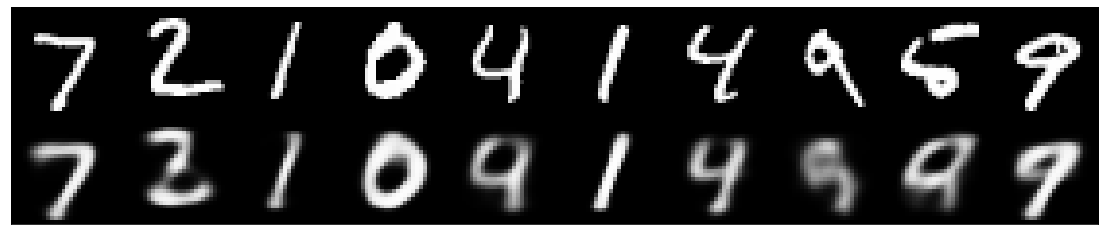

60000/60000 [==============================] - 20s - loss: 0.0891 - val_loss: 0.0795
Epoch 97/100
60000/60000 [==============================] - 20s - loss: 0.0891 - val_loss: 0.0794
Epoch 98/100
60000/60000 [==============================] - 20s - loss: 0.0891 - val_loss: 0.0795
Epoch 99/100
60000/60000 [==============================] - 20s - loss: 0.0890 - val_loss: 0.0794
Epoch 100/100
60000/60000 [==============================] - 20s - loss: 0.0890 - val_loss: 0.0794


In [ ]:
# Запуск обучения 
vae.fit(x_train, x_train, shuffle=True, epochs=100,
        batch_size=batch_size,
        validation_data=(x_test, x_test),
        callbacks=[pltfig],
        verbose=1) # грузим наши данные в модель, задаем параметры и обучаем

In [ ]:
encoder_mean.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (500, 28, 28, 1)          0         
_________________________________________________________________
flatten_1 (Flatten)          (500, 784)                0         
_________________________________________________________________
dense_1 (Dense)              (500, 256)                200960    
_________________________________________________________________
batch_normalization_1 (Batch (500, 256)                1024      
_________________________________________________________________
dropout_1 (Dropout)          (500, 256)                0         
_________________________________________________________________
dense_2 (Dense)              (500, 128)                32896     
_________________________________________________________________
batch_normalization_2 (Batch (500, 128)                512       
__________

In [ ]:
def plot_images(generator, examples=10, dim=(10,10), figsize=(15,15)): # функция добавляет шум на скрытом пространстве
    k = 1.1
    noise = np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем шум нормальным распределением
    
    im_arr = [generator.predict((k**i)*noise) for i in range(0,examples)] # получаем сгенеренные выходные картинки над заданным шумом
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()

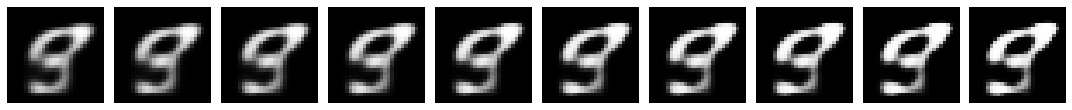

In [ ]:
plot_images(generator) # отрисовываем картинки

In [ ]:
def plot_images_two_points(generator, examples=10, dim=(10,10), figsize=(15,15)):
    
    noise1 = 1*np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем первое случайное зашумленное распределение
    noise2 = 1*np.random.normal(loc=0, scale=1, size=[1, latent_dim]) # создаем второе случайное зашумленное распределение
    
    # получаем сгенеренные выходные картинки плавным переходом от одного зашумленного к другому 
    im_arr = [generator.predict(i*noise2/(examples-1) + (examples-i-1)*noise1/(examples-1)) for i in range(0,examples)]
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()

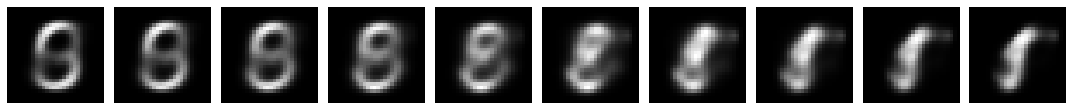

In [ ]:
plot_images_two_points(generator) # отрисовываем картинки

In [ ]:
z_imgs = models['encoder'].predict(x_test[:500], batch_size=500)

In [ ]:
print(z_imgs.shape)

(500, 10)


In [ ]:
def plot_images_two_points2(generator, z_imgs, examples=10, dim=(10,10), figsize=(15,15)):
    
    index1 = int(round(200*np.random.sample(1)[0])) # запишем в первый индекс случайно сгенерированное значение
    index2 = int(round(200*np.random.sample(1)[0])) # запишем во второй индекс случайно сгенерированное значение
    noise1 = z_imgs[index1,:].reshape(1,10) # сгенерируем первую зашумленную картинку по полученному индексу
    noise2 = z_imgs[index2,:].reshape(1,10) # сгенерируем вторую зашумленную картинку по полученному индексу
    
    # получаем сгенеренные выходные картинки плавным переходом от одного зашумленного к другому 
    im_arr = [generator.predict(i*noise2/(examples-1) + (examples-i-1)*noise1/(examples-1)) for i in range(0,examples)]
    im_arr = np.array(im_arr).reshape(examples,28,28) # переводим в numpy массив, подгоняем размеры

    plt.figure(figsize=figsize) # задаем способ отрисовки картинок
    for i in range(im_arr.shape[0]):
        plt.subplot(dim[0], dim[1], i+1)
        plt.imshow(im_arr[i], interpolation='nearest', cmap='gray')
        plt.axis('off')
    plt.tight_layout()

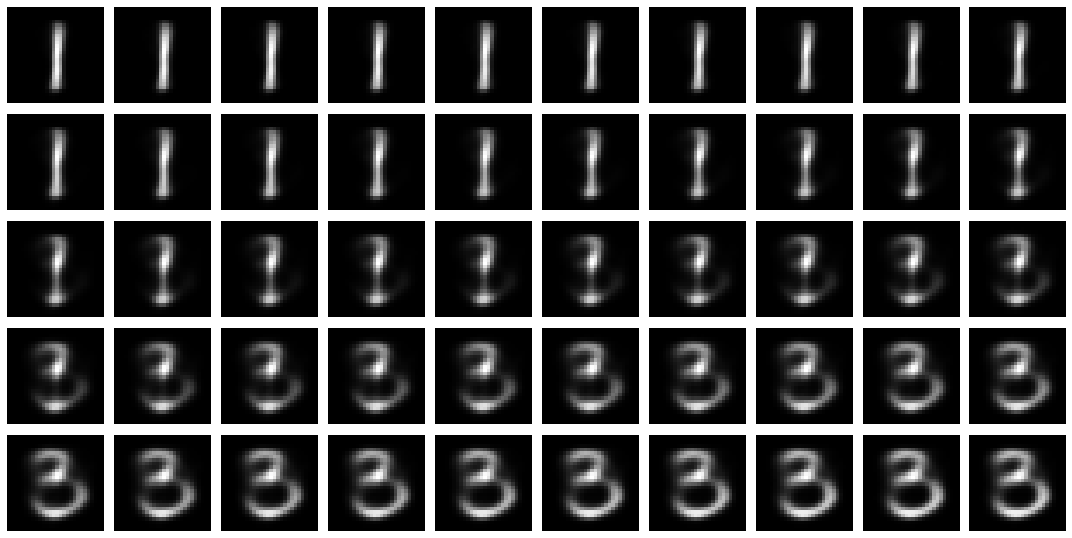

In [ ]:
plot_images_two_points2(generator, z_imgs, examples=50) # отрисовываем картинки

# CVAE

**Усилил** CVAE денс-слоями  с  дропаутом и нормализацией. Обучал на бОльшем количестве эпох

In [ ]:
!pip install keras==2.0 -q # загружаем эту версию кераса для корректной работы
!pip install tensorflow==1.0 -q  # загружаем эту версию тензорфлоу  для корректной работы 

In [ ]:
import sys # модуль содержит параметры и функции, которые относятся к Python и его среде
import numpy as np # загружаем библиотеку для работы с массивами данных
import matplotlib.pyplot as plt # из библиотеки для визуализации данных возьмём интерфейс для построения графиков простых функций
%matplotlib inline
from scipy.stats import norm # модуль с нормальными непрерывными случайными величинами
# import seaborn as sns

from keras.datasets import mnist # загружаем готовую стандартную базу рукописных цифр mnist
from keras.utils import to_categorical # загружаем утилиты кераса для one-hot кодировки
from keras.layers import Input, Dense # загружаем необходимые слои(входной, полносвязный)
from keras.layers import BatchNormalization, Dropout, Flatten, Reshape, Lambda # загружаем слои(нормализации, регуляризации и т.д)
from keras.layers import concatenate # подгружаем слой конкатенации
from keras.models import Model # загружаем абстрактный класс базовой модели сети от кераса 
from keras.objectives import binary_crossentropy # импортируем функцию потерь
from keras.layers.advanced_activations import LeakyReLU # импортируем функцию активации
from keras import backend as K # устанавливаем переменную для окружения кераса
from keras.optimizers import Adam, RMSprop # загружаем выбранные оптимизаторы
from IPython.display import clear_output # импортируем модуль очистки output'а ячейки
from keras.callbacks import LambdaCallback, ReduceLROnPlateau, TensorBoard # импортируем коллбэки

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() # загружаем данные из базы mnist с разбивкой на train/test
#(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255. # представляем x_train в виде значений от 0 до 1
x_test  = x_test .astype('float32') / 255. # представляем x_test в виде значений от 0 до 1
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1)) # меняем форму, приводим к нужным нам размерам
x_test  = np.reshape(x_test,  (len(x_test),  28, 28, 1)) # меняем форму, приводим к нужным нам размерам

y_train_cat = to_categorical(y_train).astype(np.float32) # переводим обучающие лейблы в one-hot кодировку
y_test_cat  = to_categorical(y_test).astype(np.float32) # переводим проверочные лейблы в one-hot кодировку
num_classes = y_test_cat.shape[1] # задаем количество классов

print('Получилось классов', y_test_cat.shape[1])

Получилось классов 10


In [ ]:
batch_size = 500 # размер батча
latent_dim = 8 # размер скрытого слоя/пространства
dropout_rate = 0.3 # размер слоя регуляризации, "выключим" указанное количество нейронов, во избежание переобучения
start_lr = 0.001 # шаг обучения

In [ ]:

def create_cvae(): # объявляем функцию создания вариационного автокодировщика c условием
    models = {} # задаем словарь моделей

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x): # функция будет принимать на вход слой x
        return Dropout(dropout_rate)(BatchNormalization()(x)) # и применять к нему регуляризацию/нормализацию

    # Энкодер
    input_img = Input(shape=(28, 28, 1)) # размерности строк, столбцов, фильтров одной картинки
    flatten_img = Flatten()(input_img) # добавляем слой выравнивания/сглаживания ("сплющиваем" данные в вектор)
    input_lbl = Input(shape=(num_classes,), dtype='float32') # второй вход в энкодер с учетом лейблов и по количеству классов

    x = concatenate([flatten_img, input_lbl]) # конкатенируем входы сглаженной входной картинки и input_lbl
    
    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации

    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    
    # Предсказываем параметры распределений
    
    # Вместо того чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации
    z_mean = Dense(latent_dim)(x) # скрытое пространство(мат.ожидание) размером 8
    z_log_var = Dense(latent_dim)(x) # скрытое пространство(лог.вариации) размером 8

    # Сэмплирование из Q с трюком репараметризации
    def sampling(args): # обьявляем функцию сэмплирования
        z_mean, z_log_var = args # принимаем в аргументах z_mean, z_log_var, раскусываем их
        # керасовским методом делаем нормальное распределение(500 8мерных), мат.ожидание 0, ст.отклонение 1
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # задаем самописный слой, к-й принимает лист [z_mean, z_log_var], семплирует, и на выходе выдает размерность (8,)
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var]) 

    models["encoder"]  = Model([input_img, input_lbl], l, 'Encoder') # модель энкодера от входов до лямбда слоя
    models["z_meaner"] = Model([input_img, input_lbl], z_mean, 'Enc_z_mean') # отдельная модель с путем от входов до z_mean
    models["z_lvarer"] = Model([input_img, input_lbl], z_log_var, 'Enc_z_log_var') # отдельная модель с путем от входов до z_log_var

    # Декодер
    z = Input(shape=(latent_dim, )) # задаем первую входную размерность (8,)
    input_lbl_d = Input(shape=(num_classes,), dtype='float32') # задаем вторую входную размерность по номеру классов
    x = concatenate([z, input_lbl_d]) # конкатенируем входы
 
    x = Dense(256, activation='relu')(x) # полносвязный слой на 256 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
 
    x = Dense(256)(x) # полносвязный слой на 256 нейронов
    x = LeakyReLU()(x) # применяем функцию активации отдельным слоем
    x = apply_bn_and_dropout(x) # применяем функцию добавления регуляризации/нормализации
    x = Dense(28*28, activation='sigmoid')(x) # полносвязный слой на 784 нейрона
    decoded = Reshape((28, 28, 1))(x) # меняем форму, приводим к нужным нам размерам

    models["decoder"] = Model([z, input_lbl_d], decoded, name='Decoder') # собираем модель декодера
    
    # Cобираем вариационный автокодировщик с условием(3 инпута на входе, затем первые два проходят через энкодер,
    # складываются с input_lbl_d и всё это проходит через декодер на выходе)
    models["cvae"]    = Model([input_img, input_lbl, input_lbl_d], 
                              models["decoder"]([models["encoder"]([input_img, input_lbl]), input_lbl_d]), 
                              name="CVAE")
    # Та же операция, но вместо энкодера модель z_meaner
    models["style_t"] = Model( [input_img, input_lbl, input_lbl_d] , 
                               models["decoder"] ( [models["z_meaner"]([input_img, input_lbl]), input_lbl_d] ) , 
                               name="style_transfer")
    
    
    def vae_loss(x, decoded): # объявляем самописную функцию потерь
        x = K.reshape(x, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) x через керасовскую функцию
        decoded = K.reshape(decoded, shape=(batch_size, 28*28)) # меняем размеры(в одномерный) decoded через керасовскую функцию
        xent_loss = 28*28*binary_crossentropy(x, decoded) # берем бинарную кроссэнтропию между x и decoded, с учетом пикселей
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1) # по формуле устанавливаем ошибку kl_loss
        return (xent_loss + kl_loss)/2/28/28 # функция вернет суммарную ошибку с учетом распределения и размеров пикселей

    return models, vae_loss

models, vae_loss = create_cvae() # получаем модели и свою функцию потерь
cvae = models["cvae"] # задаем модель вариационного автокодировщика с условием

In [ ]:
cvae.compile(optimizer = Adam(start_lr), loss=vae_loss) # компилируем модель с выбранным оптимайзером и своей функцией потерь

In [ ]:
digit_size = 28 # задаем размеры цифр
def plot_digits(*args, invert_colors=False): # функция отрисует две линии картинок - оригинальные и выходные из автокодировщика
    args = [x.squeeze() for x in args] # удаляем оси с одним элементом из аргументов
    n = min([x.shape[0] for x in args]) # берем минимальное от нулевой оси x'ов в аргументах
    figure = np.zeros((digit_size * len(args), digit_size * n)) # создаем фигуру с использованием массива нулей по заданным размерам

    for i in range(n):
        for j in range(len(args)): # заполняем фигуру значениями
            figure[j * digit_size: (j + 1) * digit_size,
                   i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()

    if invert_colors: # если значение invert_colors будет True
        figure = 1-figure # то фигуру делаем обратной

    plt.figure(figsize=(2*n, 2*len(args))) # плотим фигуру с заданными значениями
    plt.imshow(figure, cmap='Greys_r') # выведем ее на экран в указанных цветах
    plt.grid(False) # указываем, что сетка не нужна
    ax = plt.gca() # получаем текущий объект Axes
    ax.get_xaxis().set_visible(False) # ось координат xaxis делаем невидимой
    ax.get_yaxis().set_visible(False) # ось координат yaxis делаем невидимой
    plt.show() # выводим отрисованное на экран


n = 15 # Картинка с 15x15 цифр


## Обучение


In [ ]:
# Эпохи, в которые будем сохранять
save_epochs = set([i*5 for i in range(0,25)])

# Отслеживать будем на вот этих цифрах
imgs = x_test[:batch_size]
imgs_lbls = y_test_cat[:batch_size]
n_compare = 10

# Модели
generator      = models["decoder"]
encoder_mean   = models["z_meaner"]


# Функция, которую будем запускать после каждой эпохи
def on_epoch_end(epoch, logs):
    if epoch in save_epochs:
        clear_output() # Не захламляем output

        # Сравнение реальных и декодированных цифр
        decoded = cvae.predict([imgs, imgs_lbls, imgs_lbls], batch_size=batch_size)
        plot_digits(imgs[:n_compare], decoded[:n_compare])



# Коллбэки
pltfig = LambdaCallback(on_epoch_end=on_epoch_end)
# lr_red = ReduceLROnPlateau(factor=0.1, patience=25)
tb     = TensorBoard(log_dir='./logs')

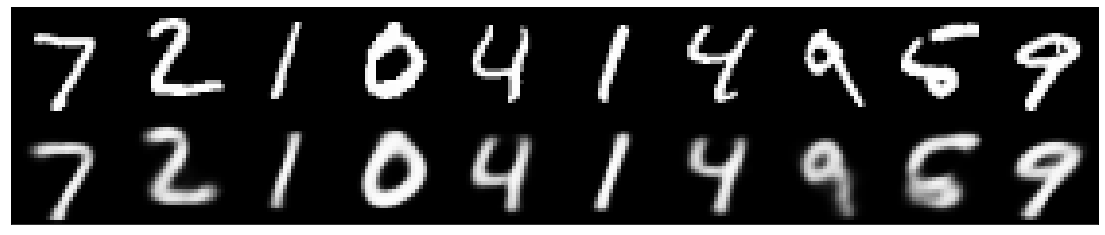

60000/60000 [==============================] - 24s - loss: 0.0780 - val_loss: 0.0699
Epoch 47/50
60000/60000 [==============================] - 24s - loss: 0.0779 - val_loss: 0.0696
Epoch 48/50
60000/60000 [==============================] - 24s - loss: 0.0779 - val_loss: 0.0697
Epoch 49/50
60000/60000 [==============================] - 23s - loss: 0.0779 - val_loss: 0.0696
Epoch 50/50
60000/60000 [==============================] - 24s - loss: 0.0779 - val_loss: 0.0695


In [ ]:
# Запуск обучения 
cvae.fit([x_train, y_train_cat, y_train_cat], x_train, shuffle=True, epochs=50,
         batch_size=batch_size,
         validation_data=([x_test, y_test_cat, y_test_cat], x_test),
         callbacks=[pltfig, tb],
         verbose=1) # грузим наши данные в модель, задаем параметры и обучаем

## Результат обучения


In [ ]:
def style_transfer(model, X, lbl_in, lbl_out): # объявляем функцию переноса стилей
    rows = X.shape[0] 
    if isinstance(lbl_in, int): # заполняем входные лейблы(энкодера)
        lbl = lbl_in 
        lbl_in = np.zeros((rows, 10)) # построчное заполнение нулями от 0 до 9
        lbl_in[:, lbl] = 1 # заполняем в нужную строчку единицу
    if isinstance(lbl_out, int): # заполняем выходные лейблы(декодера)
        lbl = lbl_out
        lbl_out = np.zeros((rows, 10)) # построчное заполнение нулями от 0 до 9
        lbl_out[:, lbl] = 1 # заполняем в нужную строчку единицу
    #print(lbl_in)
    #print(lbl_out)
    return model.predict([X, lbl_in, lbl_out]) # функция вернет предсказанные картинки

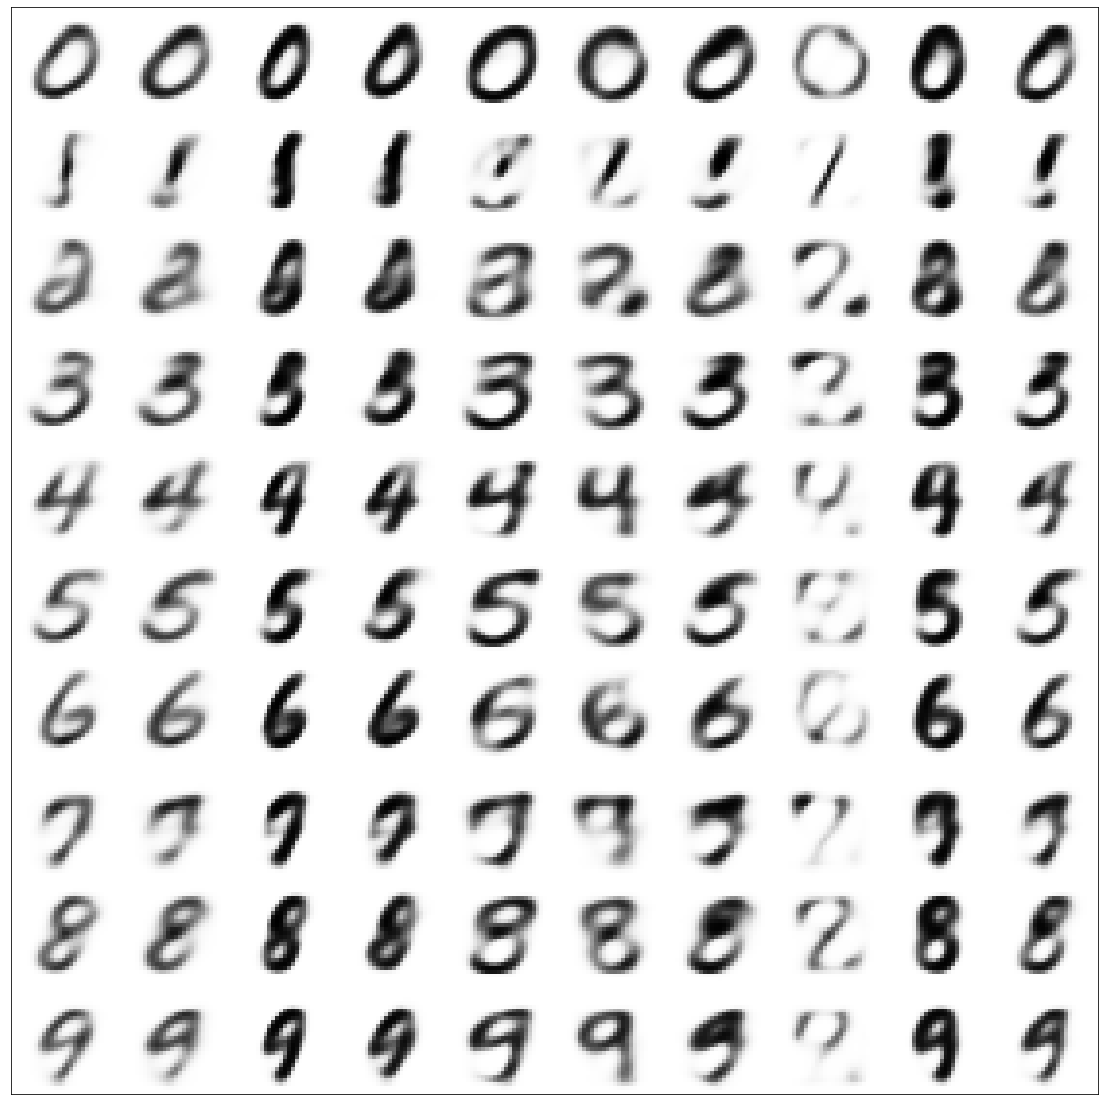

In [ ]:
n = 10 # выбираем количество картинок
lbl = 0 # выбираем лейбл
generated = [] # здесь соберем список сгенерированных картинок
prot = x_train[y_train == lbl][:n] # возьмем prot в качестве x с соответствующим выбранному значению лейбла 

for i in range(num_classes): # идем по каждому классу
    generated.append(style_transfer(models["style_t"], prot, lbl, i)) # и генерим картинки с учетом переноса стиля

#generated[lbl] = prot
plot_digits(*generated, invert_colors=True) # отрисовываем картинки

In [ ]:
#Сохранение и загрузка весов
from google.colab import drive
drive.mount('/content/drive')

"""
for model in models:
  print('Сохраняем веса', model)
  file_name = '/content/drive/My Drive/my_sample_data/Д.З.23/model_' + model + '.h5'
  models[model].save_weights(file_name)
"""

for model in models:
  print('Загружаем веса', model)
  file_name = '/content/drive/My Drive/my_sample_data/Д.З.23/model_' + model + '.h5'
  models[model].load_weights(file_name)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Сохраняем веса encoder
Сохраняем веса z_meaner
Сохраняем веса z_lvarer
Сохраняем веса decoder
Сохраняем веса cvae
Сохраняем веса style_t
Загружаем веса encoder
Загружаем веса z_meaner
Загружаем веса z_lvarer
Загружаем веса decoder
Загружаем веса cvae
Загружаем веса style_t


# PRO задание

 
**Вариант 2**

Сделайте генерацию аудио с помощью VAE

* Возьмите базу жанров музыки
* Обучите вариационный автокодировщик на всей базе на основе спектрограмм (mfcc)
* Сделайте генерацию спектрограмм с помощью VAE
* Сделайте обратное превращение из спектра в аудио с помощью librosa.feature.inverse.mfcc_to_audio


In [ ]:
# Устанавливаем librosa 0.7 (для использованя функции librosa.features.inverse.mfcc_to_audio)
!pip install git+https://github.com/librosa/librosa 

  Cloning https://github.com/librosa/librosa to /tmp/pip-req-build-opw2q9e8
  Running command git clone -q https://github.com/librosa/librosa /tmp/pip-req-build-opw2q9e8
     |████████████████████████████████| 51kB 4.4MB/s 
  Created wheel for librosa: filename=librosa-0.8.0-cp36-none-any.whl size=201375 sha256=9cdc8980cc6c405b57172b708dca12ecc51215189c4b98e81c0432c48fcddae1
  Stored in directory: /tmp/pip-ephem-wheel-cache-1i3dc139/wheels/ff/3e/4c/a872019d317d55de16e91a60bee1fb10a6404d1edb91fb4318
Successfully built librosa
  Found existing installation: librosa 0.6.3
    Uninstalling librosa-0.6.3:
      Successfully uninstalled librosa-0.6.3


In [ ]:
# Понижаем версию keras и tensorflow
!pip install keras==2.0
!pip install tensorflow==1.0

     |████████████████████████████████| 194kB 10.1MB/s 
  Created wheel for keras: filename=Keras-2.0.0-cp36-none-any.whl size=227985 sha256=f01c489d2b6a93d7511c0253ebfe317d5e65f474f2f2c0fe2ff37676672c9767
  Stored in directory: /root/.cache/pip/wheels/b0/a1/f4/f5f6a53dd71728cae0176b860f8c4304dd5d3fc2b8387ef59c
Successfully built keras
ERROR: textgenrnn 1.4.1 has requirement keras>=2.1.5, but you'll have keras 2.0.0 which is incompatible.
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3
     |████████████████████████████████| 44.5MB 69kB/s 
  Found existing installation: tensorflow 2.3.0
    Uninstalling tensorflow-2.3.0:
      Successfully uninstalled tensorflow-2.3.0


In [ ]:
# Остальные библиотеки
import numpy as np

import librosa
import librosa.display

from keras.layers import Input, Dense, BatchNormalization, Dropout, Flatten, Lambda, LeakyReLU, Reshape, Conv2D
from keras.models import Model
from keras.callbacks import LambdaCallback, ReduceLROnPlateau, TensorBoard
from keras import backend as K
from keras.objectives import binary_crossentropy
from keras.optimizers import Adam, RMSprop
import keras.losses
from sklearn.model_selection import train_test_split

import IPython.display as ipd
from IPython.display import clear_output

import os
import io         #Для работы с папками и файлами
import zipfile    #Для разархивации базы
from google.colab import drive


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:472: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:473: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:474: FutureWarn

In [ ]:
# Подключаем гугл-диска
drive.mount('/content/drive')

NameError: ignored

In [ ]:
# Импортируем  и разархивирование музыкальную базу музыкальных файлов из ДЗ21
z = zipfile.ZipFile('/content/drive/My Drive/my_sample_data/Д.З.21/genres.zip', 'r')
z.extractall()

#В архиве названия папок совпадают с названиями жанров
genres = 'blues classical country disco hiphop jazz metal pop reggae rock'.split()
print('Список жанров', genres)

#Проверяем выгруженные папки
!ls genres 
#!ls genres/blues


Список жанров ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
blues  classical  country  disco  hiphop  jazz	metal  pop  reggae  rock


In [ ]:
# Устанавливаем переменные 

batch_size = 20          # Размер батча
latent_dim = 15          # Размерность скрытого пространства
dropout_rate = 0.2       # Dropout parametr 
start_lr = 0.01          # Параметр оптимайзера
mfcc_len = 40            # Количество уровней mfcc 
mfcc_count = 500         # Длинна mfcc (устанавливает длинну звукового участка  в отсчетах mfcc)


In [ ]:
# Создание полного X_train, содержащего mfcc каждого файла

X_train_full = []

#mfcc_min = 1300

#цикл по жанрам
for i in range(len(genres)):
  g = genres[i]

  #цикл по файлам в папке
  for filename in os.listdir(f'./genres/{g}'):

    songname = f'./genres/{g}/{filename}'
    y, sr = librosa.load(songname, mono=True, duration=30)         #читаем файл (30 секунд)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=mfcc_len)       #получаем mfcc файла
    #if mfcc_min < mfcc.shape[1]:
    #  mfcc_min = mfcc.shape[1]
    X_train_full.append(mfcc[:,:1290])                             #сохраняем mfcc в X_train (1290 минимум отсчетов mfcc в файле)
    #print('Файл ', filename, 'готов')

  print('Жанр ', g, 'готов')

# Переводим X_train в numpy
X_train_full = np.array(X_train_full) 
# и посмотрим форму массива 
print(X_train_full.shape)

Жанр  blues готов
Жанр  classical готов
Жанр  country готов
Жанр  disco готов
Жанр  hiphop готов
Жанр  jazz готов
Жанр  metal готов
Жанр  pop готов
Жанр  reggae готов
Жанр  rock готов
(1000, 40, 1290)


In [ ]:
# Получаем короткие отрезки mfcс. Если 400,  то это  400 * 23мс = 9 сек
curr = X_train_full[:,:,:mfcc_count]

# Делим на обучающую и тестовую выборки
X_train, X_test = train_test_split(curr, shuffle = True, test_size=0.1)

#X_train = curr[:-100,:,:]
#X_test = curr[-100:,:,:]
print (X_train.shape)
print (X_test.shape)

(900, 40, 500)
(100, 40, 500)


In [ ]:
# Нормализуем данные в диапазон 0..1

minn = np.min(X_train)
xx_train = X_train - minn
xx_test = X_test - minn

maxx = np.max(xx_train)
xx_train = xx_train / maxx 
xx_test = xx_test / maxx 

In [ ]:
# Функция создания VAE

def create_vae():
 
    models = {}               #словарь элементов автокодировщика (энкодер, декодер, VAE, ...)

    # Добавим Dropout и BatchNormalization
    def apply_bn_and_dropout(x):
        return Dropout(dropout_rate)(BatchNormalization()(x))

    # Энкодер
    input_img = Input(batch_shape=(batch_size, mfcc_len, mfcc_count))

    x = Flatten()(input_img)      
    x = Dense(128, activation='relu')(x)
    x = apply_bn_and_dropout(x)    
    x = Dense(64, activation='relu')(x)
    x = apply_bn_and_dropout(x)
    x = Dense(32, activation='relu')(x)
    x = apply_bn_and_dropout(x)

    # Предсказываем параметры распределений
    # Вместо того, чтобы предсказывать стандартное отклонение, предсказываем логарифм вариации    
    
    # Мю-слой
    z_mean = Dense(latent_dim)(x) 

    # Сигма-слой
    z_log_var = Dense(latent_dim)(x)

    # Сэмплирование из Q с трюком репараметризации (Переводим вектор нормального распределения в распределение "мю-сигма")
    def sampling(args):
        z_mean, z_log_var = args
        epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)        
        return z_mean + K.exp(z_log_var / 2) * epsilon

    # Добавляем свой собственный слой Lambda  
    l = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

    # Записываем элементы в словарь models
    models["encoder"]  = Model(input_img, l, 'Encoder')     
    models["z_meaner"] = Model(input_img, z_mean, 'Enc_z_mean')    
    models["z_lvarer"] = Model(input_img, z_log_var, 'Enc_z_log_var')

    # Декодер
    z = Input(shape=(latent_dim, ))
    x = Dense(32, activation='relu')(z) 
    x = apply_bn_and_dropout(x)
    x = Dense(64, activation='relu')(x)   
    x = apply_bn_and_dropout(x)  
    x = Dense(128, activation='relu')(x)   
    x = apply_bn_and_dropout(x)
    x = Dense(mfcc_len*mfcc_count, activation='sigmoid')(x)
    decoded = Reshape((mfcc_len, mfcc_count))(x)
    
    models["decoder"] = Model(z, decoded, name='Decoder')    
    models["vae"] = Model(input_img, models["decoder"](models["encoder"](input_img)), name='VAE')

    # Создаем функцию ошибки
    def vae_loss(x, decoded):
      # Решейпим оригинальный пример (x) и генерированный (decoded))
        x = K.reshape(x, shape=(batch_size, mfcc_len*mfcc_count))
        decoded = K.reshape(decoded, shape=(batch_size, mfcc_len*mfcc_count))
        # Вычисляем стандартную ошибку с помощью binary_crossentropy
        xent_loss = mfcc_len*mfcc_count*binary_crossentropy(x, decoded) 
        # Вычисляем расстояние кульбака-лейблера
        kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
        # Возвращаем окончательную ошибку
        return abs((xent_loss + kl_loss)/2/mfcc_len/mfcc_count)

    # Возвращаем список модели и функцию ошибки
    return models, vae_loss

In [ ]:
# Создаем VAE
models, vae_loss = create_vae()
vae = models["vae"]

In [ ]:
# Комплируем 
vae.compile(optimizer=Adam(start_lr), loss=vae_loss)

In [ ]:
# Обучаем
vae.fit(xx_train, xx_train, shuffle=True, \
        epochs=20, \
        batch_size=batch_size, \
        validation_data = [xx_test, xx_test], \
        verbose=1)

Train on 900 samples, validate on 100 samples
Epoch 1/20
900/900 [==============================] - 9s - loss: 0.3111 - val_loss: nan
Epoch 2/20
900/900 [==============================] - 7s - loss: 0.2938 - val_loss: inf
Epoch 3/20
900/900 [==============================] - 7s - loss: 0.2926 - val_loss: 811938868649251831808.0000
Epoch 4/20
900/900 [==============================] - 7s - loss: 0.2922 - val_loss: 6065377.0500
Epoch 5/20
900/900 [==============================] - 7s - loss: 0.2919 - val_loss: 22.7283
Epoch 6/20
900/900 [==============================] - 7s - loss: 0.2917 - val_loss: 0.6416
Epoch 7/20
900/900 [==============================] - 7s - loss: 0.2917 - val_loss: 0.3111
Epoch 8/20
900/900 [==============================] - 7s - loss: 0.2916 - val_loss: 0.2971
Epoch 9/20
900/900 [==============================] - 7s - loss: 0.2915 - val_loss: 0.2919
Epoch 10/20
900/900 [==============================] - 7s - loss: 0.2915 - val_loss: 0.2913
Epoch 11/20
900/900 [=

In [ ]:
# Предикт набора x_test
predict = vae.predict(xx_test, batch_size=batch_size)

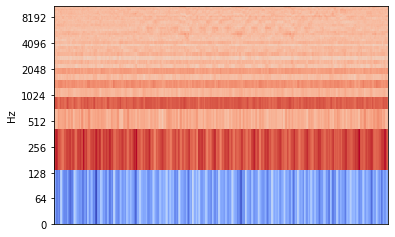

In [ ]:
n = 17
# Отображаем пример mfcc из xx_test
librosa.display.specshow(xx_test[n]*maxx+minn, y_axis='log')

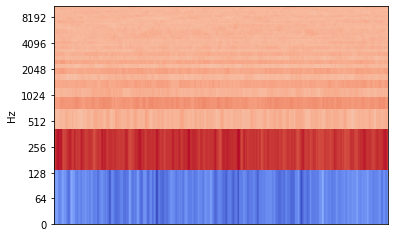

In [ ]:
# Отображаем mfcc из предикта
librosa.display.specshow(predict[n]*maxx+minn, y_axis='log')

**Восстанавливаем звук из спектра и сравниваем что получилось**

In [ ]:
song_orig = librosa.feature.inverse.mfcc_to_audio(xx_test[n]*maxx+minn)
song_pred = librosa.feature.inverse.mfcc_to_audio(predict[n]*maxx+minn)

In [ ]:
# Оригинальная
ipd.Audio(song_orig, rate = sr)

In [ ]:
# Предикт
ipd.Audio(song_pred, rate = sr)

**Пробовал брать 40 уровней mfсс вместо 20. Увеличивал размер внутренненего слоя. Добавил полносвязный слой на 128 нейронов. Качество как было слабое так и осталось**